# Proyecto 2: Clasificación sentimientos en reviews de películas
## Componentes: Daniel Martínez Jiménez, Javier de Terry Coronel y Marta Venegas Pardo
https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews   


La clasificación de sentimientos en textos busca asignar a un texto un sentimiento, positivo, neutro o negativo. En este caso particular los reviews de películas son clasificados en cinco clases: 0 - negative, 1 - somewhat negative, 2 - neutral, 3 - somewhat positive, 4 - positive. 


Estas técnicas se pueden aplicar para monitorear redes sociales, sitios de ecommerce o call centers. Los mensajes son clasificados en función de su sentimiento y los que puedan indicar posibles problemas para el negocio son analizados y eventualmente manejados de forma especial.


Sugerencias:

- Visualizar un conjunto de frases y sus sentimientos asociados.

- Analizar las etapas de pre procesamiento que podrían ser necesarias para preparar los datos.

- Haga un análisis estadístico de los datos para saber cuántos datos hay de cada clase. 

- Compare dos técnicas de clasificación diferentes, una clásica y otra basada en redes de convolución.

**Nota**: Utilice Scikit Learn y Keras para construir la solución.

Para la evaluación de ambas técnicas visualice la matriz de confusión. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Descargamos los datos de prueba yelp_labelled.txt


#https://drive.google.com/file/d/1lJ2AUq4ad9xmpzTV_lApKlBtFgSBn3IL/view?usp=share_link
# https://drive.google.com/file/d/1KuJ3toInZy7LCqvwfjscyRDMk72xfJkM/view?usp=share_link
!gdown --id 1lJ2AUq4ad9xmpzTV_lApKlBtFgSBn3IL
!gdown --id 1KuJ3toInZy7LCqvwfjscyRDMk72xfJkM

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lJ2AUq4ad9xmpzTV_lApKlBtFgSBn3IL
To: /content/train.tsv
100% 8.48M/8.48M [00:00<00:00, 112MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KuJ3toInZy7LCqvwfjscyRDMk72xfJkM
To: /content/test.tsv
100% 3.37M/3.37M [00:00<00:00, 240MB/s]


## Lectura de datos
### Datos de entrenamiento

In [ ]:
filepath1 = "train.tsv"

train_data = pd.read_csv(filepath1, sep='\t')

Visualizamos los datos de entrenamiento:

In [ ]:
train_data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


### Datos de testeo 

Visualizamos los datos de testeo

In [ ]:
filepath2 = "test.tsv" # Datos de testeo
test_data = pd.read_csv(filepath2, sep='\t')

In [ ]:

test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


### Descripción de los datos

El conjunto de datos de reseñas de películas de Rotten Tomatoes consta de una serie de frases sobre las películas clasificadas en una escala de cinco valores.

Nuestro **objetivo** será conseguir el mejor clasificador para etiquetar las oraciones del conjunto de testeo con la mayor precisión posible.


En este proyecto, los datos se estructuran de la siguiente forma:



Tenemos un dataset de entrenamiento y otro de testeo. 

Los datos de *entrenamiento* los utilizaremos para entrenar y validar el modelo, para posteriormente, una vez exista un modelo definitivo, utilizarlo con los datos *test* para conseguir clasificar las películas de este conjunto de datos.

Es decir, el conjunto de datos de testeo no lo utilizaremos para entrenar, sino que últimamente lo utilizaremos para testear, es decir, clasificar las frases en una de las cinco clases existentes. 


**Datos de entrenamiento**: Tenemos un conjunto de datos con las siguientes variables:

- PhraseId: Identificador del registro (uno para cada fila)
- SentenceId: Identificador de la frase
- Phrase: Frase en cuestión
- Sentiment: Variable objetivo (categórica). Se trata del sentimiento provocado al espectador, y consta de cinco clases:
    
    - 0: Negativo
    - 1: Algo negativo
    - 2: Neutro
    - 3: Algo positivo
    - 4: Positivo

**Datos de testeo**: En este conjunto de datos no tenemos la variable *sentimiento*, ya que es el objetivo de este ejercicio, entrenar un buen modelo para poder clasificar las frases del conjunto de testeo en función de una de las cinco clases.

In [ ]:
print('El conjunto de datos de entrenamiento consta de {} filas, es decir, tenemos {} comentarios sobre películas con su clasificación.\nPor ello, tendremos que aplicar el modelo en los datos de testeo para clasificar un total de {} comentarios de películas.'.format(train_data.shape[0],train_data.shape[0],test_data.shape[0]))

El conjunto de datos de entrenamiento consta de 156060 filas, es decir, tenemos 156060 comentarios sobre películas con su clasificación.
Por ello, tendremos que aplicar el modelo en los datos de testeo para clasificar un total de 66292 comentarios de películas.


In [ ]:
print('Información de los datos de entrenamiento: \n')
train_data.info()

Información de los datos de entrenamiento: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
print('Información de los datos de testeo: \n')
test_data.info()

Información de los datos de testeo: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


No tenemos datos faltantes ni en los datos de entrenamiento ni en el testeo, por lo que todas las filas están completas.

Para entrenar la red, únicamente necesitamos la frase y el sentimiento (target), por lo que vamos a eliminar los identificadores, ya que no nos aportan información sobre la variable objetivo. 

Por lo que ahora únicamente tenemos dos columnas en el conjunto de entrenamiento y una en el testeo.

In [ ]:
train_data = train_data.drop(['PhraseId','SentenceId'],axis = 1)
test_data = test_data.drop(['PhraseId','SentenceId'],axis = 1)

## Visualizar un conjunto de frases y sus sentimientos asociados


In [ ]:
for i in range(0,15):
  print('\nFrase',i+1,':',train_data.iloc[i,0])
  print('\nSentimiento:',train_data.iloc[i,1])
  print('\n')


Frase 1 : A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .

Sentimiento: 1



Frase 2 : A series of escapades demonstrating the adage that what is good for the goose

Sentimiento: 2



Frase 3 : A series

Sentimiento: 2



Frase 4 : A

Sentimiento: 2



Frase 5 : series

Sentimiento: 2



Frase 6 : of escapades demonstrating the adage that what is good for the goose

Sentimiento: 2



Frase 7 : of

Sentimiento: 2



Frase 8 : escapades demonstrating the adage that what is good for the goose

Sentimiento: 2



Frase 9 : escapades

Sentimiento: 2



Frase 10 : demonstrating the adage that what is good for the goose

Sentimiento: 2



Frase 11 : demonstrating the adage

Sentimiento: 2



Frase 12 : demonstrating

Sentimiento: 2



Frase 13 : the adage

Sentimiento: 2



Frase 14 : the

Sentimiento: 2



Frase 15 : adage

Sentimiento: 2




## Preprocesamiento de los datos

En esta etapa del proyecto vamos a preparar los datos, ya que hemos encontrado frases con una única letra, quitaremos mayúsculas, espacios, caracteres extraños,...

Para trabajar con las frases, que son cadenas de texto, podemos limpiarlas haciendo uso de la librería **re**, dedicada a expresiones regulares.

Procedemos a importar esta librería para el procesamiento de las frases.

In [ ]:
import re # Librerías para regular expressions


### Eliminación de los puntos

In [ ]:
# Recorremos el dataset y eliminamos los puntos de las frases
train_data['Phrase']=train_data['Phrase'].apply(lambda i: ' '.join(i.split('.'))) 
test_data['Phrase']=test_data['Phrase'].apply(lambda i: ' '.join(i.split('.'))) 

### Utilizar únicamente minúsculas

In [ ]:
# Recorremos el dataset y cambiamos las mayúscylas por minúsculas
train_data['Phrase']=train_data['Phrase'].apply(lambda i: i.lower()) 
test_data['Phrase']=test_data['Phrase'].apply(lambda i: i.lower()) 

### Eliminamos los caracteres especiales de las frases y espacios sobrantes

En primer lugar, quitamos los caracteres \ y / de las frases. Vamos a ilustrar este proceso con unas cuantas filas del datset:

In [ ]:
for i in range(155966,155968):
  print('-'*70)
  print('Frase nº:',i)
  print('Se han encontrado los siguientes caracteres \: \n',re.findall(r'\\', train_data.iloc[i,0]))
  print('\nLa frase:\n',train_data.iloc[i,0],'\nSe va a transformar en:')
  frase =  re.sub(r'\\', ' ', train_data.iloc[i,0])
  frase = re.sub('\/', ' ', frase)
  print(frase)

for i in range(152061,152064):
  print('-'*70)
  print('Frase nº:',i)
  print('Se han encontrado los siguientes caracteres \: \n',re.findall(r'\\', train_data.iloc[i,0]))
  print('\nLa frase:\n',train_data.iloc[i,0],'\nSe va a transformar en:')
  frase =  re.sub(r'\\', ' ', train_data.iloc[i,0])
  frase = re.sub('\/', ' ', frase)
  print(frase)


----------------------------------------------------------------------
Frase nº: 155966
Se han encontrado los siguientes caracteres \: 
 ['\\']

La frase:
 has turned out nearly 21\/2 hours of unfocused , excruciatingly tedious cinema that , half an hour in , starts making water torture seem appealing 
Se va a transformar en:
has turned out nearly 21  2 hours of unfocused , excruciatingly tedious cinema that , half an hour in , starts making water torture seem appealing
----------------------------------------------------------------------
Frase nº: 155967
Se han encontrado los siguientes caracteres \: 
 ['\\']

La frase:
 turned out nearly 21\/2 hours of unfocused , excruciatingly tedious cinema that , half an hour in , starts making water torture seem appealing 
Se va a transformar en:
turned out nearly 21  2 hours of unfocused , excruciatingly tedious cinema that , half an hour in , starts making water torture seem appealing
----------------------------------------------------------

In [ ]:
# Recorremos el dataset y eliminamos \ y /
train_data['Phrase']=train_data['Phrase'].apply(lambda i: re.sub(r'\\',' ',i)) # Elimina \
train_data['Phrase']=train_data['Phrase'].apply(lambda i: re.sub('\/',' ',i)) # Elimina /

test_data['Phrase']=test_data['Phrase'].apply(lambda i: re.sub(r'\\',' ',i)) # Elimina \
test_data['Phrase']=test_data['Phrase'].apply(lambda i: re.sub('\/',' ',i)) # Elimina /



A continuación, eliminamos espacios iniciales de las frases y caracteres especiales como *'-'* y *'*. A continuación vemos unas cuantas frases de ejemplo para ilustrar lo que hacemos:

In [ ]:
for i in range(2570,2575):
  print('-'*70)
  print('Frase nº:',i)
  print('Se han encontrado los siguientes caracteres o espacios: \n',re.findall(r'\W+', train_data.iloc[i,0]))
  print('\nLa frase:\n',train_data.iloc[i,0],'\nSe va a transformar en:\n',re.sub(r'\W+', ' ', train_data.iloc[i,0].strip().lower()).strip())



----------------------------------------------------------------------
Frase nº: 2570
Se han encontrado los siguientes caracteres o espacios: 
 []

La frase:
 tagline 
Se va a transformar en:
 tagline
----------------------------------------------------------------------
Frase nº: 2571
Se han encontrado los siguientes caracteres o espacios: 
 [" '", ' ', ' ', ' ', ' ', '  ']

La frase:
 there 's definite room for improvement   
Se va a transformar en:
 there s definite room for improvement
----------------------------------------------------------------------
Frase nº: 2572
Se han encontrado los siguientes caracteres o espacios: 
 ["'", ' ', ' ', ' ', ' ', '  ']

La frase:
 's definite room for improvement   
Se va a transformar en:
 s definite room for improvement
----------------------------------------------------------------------
Frase nº: 2573
Se han encontrado los siguientes caracteres o espacios: 
 ["'", ' ', ' ', ' ', ' ']

La frase:
 's definite room for improvement 
Se va a 

In [ ]:
# Recorremos el dataset y eliminamos espacios sobrantes, - y ' 
train_data['Phrase']=train_data['Phrase'].apply(lambda i: re.sub(r'\W+', ' ', i.strip().lower()).strip()) 
test_data['Phrase']=test_data['Phrase'].apply(lambda i: re.sub(r'\W+', ' ', i.strip().lower()).strip())  


 ## Análisis estadístico de los datos para saber cuántos datos hay de cada clase

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


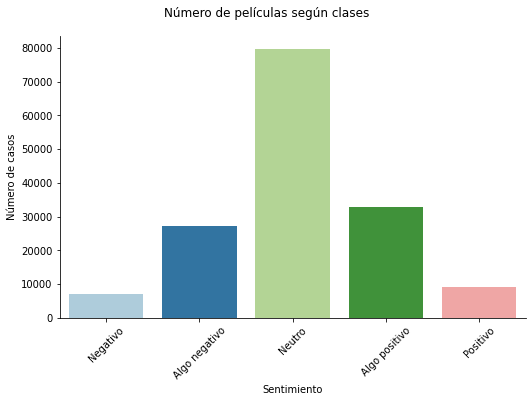

In [ ]:
import seaborn as sns 

train_data.Sentiment.value_counts()
fg = sns.catplot('Sentiment', data=train_data, kind='count', aspect=1.5,
                #order=train_data.Sentiment.value_counts().index,
                 palette='Paired')
plt.xticks([0,1,2,3,4],['Negativo','Algo negativo','Neutro','Algo positivo','Positivo'])
plt.xticks(rotation=45)
fg.set_xlabels('Sentimiento')
fg.set_ylabels('Número de casos')
fg.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
fg.fig.suptitle('Número de películas según clases')
plt.show()



Observamos como la mayoría de las películas han sido clasificadas con un sentimiento *neutro*, ya que son casi 80 mil películas calificadas con esta etiqueta, en concreto son 79582 valoraciones como sentimiento neutro. Del resto, existen más películas clasificadas positivamente que negativamente, pero la diferencia tampoco es muy acentuada. Poco más de 30 mil películas (32927) son clasificadas como algo positivas y poco más de 9 mil como positivas. Por el contrario, las películas algo negativas no superan los 30 mil casos y las clasificadas con un sentimiento negativo no son más que 7072 en total.

In [ ]:
train_data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

## Técnicas de clasificación 

A continuación aplicaremos dos técnicas de clasificación basadas en redes neuronales. La primera de ellas, será una red neuronal clásica y para la segunda aplicaremos la técnica conocida como word embeddings.

La diferencia reside en que haciendo uso de word embedding, logramos recuperar la visión de secuencia de las palabras que perdíamos con la red neuronal clásica, ya que con esta última, no se impone el orden de las palabras en el dicionario, y en la vida real, las palabras están vinculadas entre sí.

### División de los datos de entrenamiento y testeo

Para crear el modelo de clasificación, vamos a hacer una división de los datos de entrenamiento en las siguientes partes: un conjunto de datos de entrenamiento y otro de validación. Utilizaremos el **75%** de los registros para entrenar y el **25%** restante para validar el modelo.


In [ ]:
# Separamos el conjunto de datos en train y test

from sklearn.model_selection import train_test_split

Frases = train_data['Phrase'].values
y = train_data['Sentiment'].values # Variable Target, la que quiero predecir
# 75% para entrenar y 25% para testear
frases_entrenamiento, frases_validacion, y_entrenamiento, y_validacion = train_test_split(Frases, y, test_size=0.25, random_state=1000)

In [ ]:
frases_testeo =  test_data['Phrase'].values
print('Algunas frases de testeo:')
[print('\n',i) for i in frases_testeo[0:10]]

Algunas frases de testeo:

 an intermittently pleasing but mostly routine effort

 an intermittently pleasing but mostly routine effort

 an

 intermittently pleasing but mostly routine effort

 intermittently pleasing but mostly routine

 intermittently pleasing but

 intermittently pleasing

 intermittently

 pleasing

 but


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features= 1000 # Elegiremos las mil palabras que más se repiten
vectorizer = CountVectorizer(max_features=max_features)
vectorizer.fit(frases_entrenamiento) 

print("Cantidad de palabras en el vectorizador: ", len(vectorizer.get_feature_names())) # Número de palabras del vocabulario

X_entrenamiento = vectorizer.transform( frases_entrenamiento ) # 
X_validacion  = vectorizer.transform( frases_validacion )


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cantidad de palabras en el vectorizador:  1000


In [ ]:
# Inspeccionamos el resultado de la vectorización

# Cojo la frase 0 del dataframe inicial
print("Frase : \n", frases_entrenamiento[100]) # Texto
print("Representación esparsa: \n", X_entrenamiento[100] ) # Hay un uno en las posiciones: 125,145,201,...
# Representación esparsa, que transforma una matriz con ceros y un pocos valores no nulos en  cada fila


# Vocabulario
print( vectorizer.get_feature_names() ) 

Frase : 
 going to this movie is a little like chewing whale blubber it s an acquired taste that takes time to enjoy but it s worth it even if it does take 3 hours to get through
Representación esparsa: 
   (0, 40)	1
  (0, 109)	1
  (0, 212)	1
  (0, 245)	1
  (0, 258)	1
  (0, 346)	1
  (0, 356)	1
  (0, 407)	1
  (0, 416)	1
  (0, 442)	1
  (0, 444)	4
  (0, 481)	1
  (0, 485)	1
  (0, 550)	1
  (0, 823)	1
  (0, 825)	1
  (0, 831)	1
  (0, 840)	1
  (0, 856)	1
  (0, 864)	1
  (0, 866)	1
  (0, 870)	3
  (0, 985)	1
['10', '20', '90', 'ability', 'able', 'about', 'above', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actors', 'actress', 'actually', 'adaptation', 'add', 'adults', 'adventure', 'after', 'again', 'against', 'age', 'ages', 'ago', 'air', 'all', 'almost', 'alone', 'along', 'already', 'also', 'always', 'ambitious', 'america', 'american', 'among', 'amount', 'amusing', 'an', 'and', 'animated', 'animation', 'another', 'anti', 'any', 'anyone', 'anything', 'appeal', 'appealing', 'approach', 

### Red Neuronal clásica

A continuación, se muestra la red neuronal clásica que vamos a emplear a nuestro modelo. 

Iniciamos el modelo de forma secuencial con dos capas ocultas; la primera capa contiene **160 neuronas** y la segunda capa consta de **50 neuronas**. La capa de salida contiene 5 neuronas que corresponden a las 5 clases de la variable objetivo.

La función de activación *softmax* para la última capa se ha elegido debido a que se trata de un problema de clasificación múltiple. Con esta función, obtendremos para cada frase  un valor entre 0 y 1 para cada una de las categorías, por lo que podemos ver estos valores como la probabilidad de que la frase pertenezca a cada categoría.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# La cantidad de entradas es el tamaño del vocabulario
input_dim = X_entrenamiento.shape[1]  # Número de columnas

model = Sequential()

# Una capa densa con 10 neuronas
model.add(Dense(30, 
                input_dim=input_dim, # Dim de entrada son 15222 filas
                activation='relu'))
# Una capa densa de salida con 5 neuronas, una por clsae
model.add(Dense(5, activation='softmax')) #cinco neuronas en la salida por las 5 clases

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                30030     
                                                                 
 dense_4 (Dense)             (None, 5)                 155       
                                                                 
Total params: 30,185
Trainable params: 30,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Transformamos los y a categorical
from tensorflow.keras.utils import to_categorical

# Tengo que transformar a categoricas las etiquetas, ya que puse dos neuronas a la salida
# Y train tiene 0s y 1s
# 0 lo paso a (1,0,0,0,0) 
# 1 lo paso a (0,1,0,0,0)
# 2 lo paso a (0,0,1,0,0)
# 3 lo paso a (0,0,0,1,0)
# 4 lo paso a (0,0,0,0,1)

y_entrenamiento_categorico = to_categorical( y_entrenamiento )
y_validacion_categorico = to_categorical( y_validacion )

X_entrenamiento_dense = X_entrenamiento.todense() # Paso de representación esparsa a densa
X_validacion_dense = X_validacion.todense()
print('Entrenamiento \t Validación')
print('x ',X_entrenamiento_dense.shape,X_validacion_dense.shape)
print('y ',y_entrenamiento_categorico.shape,y_validacion_categorico.shape)

Entrenamiento 	 Validación
x  (117045, 1000) (39015, 1000)
y  (117045, 5) (39015, 5)


In [ ]:
# Entrenamos el modelo con los datos de entrenamiento y validamos con los de validación
history = model.fit(X_entrenamiento_dense, y_entrenamiento_categorico,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_validacion_dense, y_validacion_categorico),   
                    batch_size=10)

Epoch 1/30
11705/11705 [==============================] - 42s 4ms/step - loss: 1.0803 - accuracy: 0.5784 - val_loss: 1.0410 - val_accuracy: 0.5928
Epoch 2/30
11705/11705 [==============================] - 46s 4ms/step - loss: 1.0062 - accuracy: 0.6087 - val_loss: 1.0225 - val_accuracy: 0.5983
Epoch 3/30
11705/11705 [==============================] - 46s 4ms/step - loss: 0.9743 - accuracy: 0.6224 - val_loss: 1.0144 - val_accuracy: 0.6034
Epoch 4/30
11705/11705 [==============================] - 47s 4ms/step - loss: 0.9514 - accuracy: 0.6326 - val_loss: 1.0121 - val_accuracy: 0.6072
Epoch 5/30
11705/11705 [==============================] - 44s 4ms/step - loss: 0.9324 - accuracy: 0.6410 - val_loss: 1.0086 - val_accuracy: 0.6075
Epoch 6/30
11705/11705 [==============================] - 50s 4ms/step - loss: 0.9172 - accuracy: 0.6475 - val_loss: 1.0116 - val_accuracy: 0.6087
Epoch 7/30
11705/11705 [==============================] - 44s 4ms/step - loss: 0.9051 - accuracy: 0.6515 - val_loss: 1

Con 30 épocas y 1000 palabras no conseguimos mejorar mucho conforme avanzan las épocas, en el entrenamiento nos estancamos alrededor de un $R^2 \in [0.6,0.63]$ mientras que para la validación no conseguimos alcanzar un valor de $R^2 =0.6$ hasta la época 21. Sin embargo, esta métrica no se mantiene, y oscila en torno a un valor de coeficiente de correlación de 0.6.

A continuación, modificamos la red de la siguiente forma:
- Primera capa densa: 160 neuronas
- Segunda capa densa: 50 neuronas

Al ejecutar observamos que en las métricas ocurría lo siguiente: al iniciar la red, el valor de la precisión en la validación ya alcanzó un valor de 0.61 en la primera época. Este valor no se alcanzó para la red actual hasta la época 21, sin embargo, el valor de la pérdida era mucho mayor para la red con las dos capas densas. Además, el coste computacional de introducir otra capa densa era muy alto y los resultados obtenidos tampoco superaron a los de la red simple.

Por ello, hemos decidido seleccionar como modelo de red neuronal definitiva la que únicamente dispone de **una capa densa**

Ahora, evaluamos el modelo y comparamos la precisión en los datos de entrenamiento y testeo:

In [ ]:
loss, accuracy = model.evaluate(X_entrenamiento_dense, y_entrenamiento_categorico, verbose=False)
print("Precisión en el entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_validacion_dense, y_validacion_categorico, verbose=False)
print("Precisión en el testeo:  {:.4f}".format(accuracy))

Precisión en el entrenamiento: 0.7041
Precisión en el testeo:  0.6071


Graficamos la pérdida y la precisión

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Acc entrenamiento')
    plt.plot(x, val_acc, 'r', label='Acc validación')
    plt.title('Precisión en el entrenamiento y la validación')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Pérdida en el entrenamiento')
    plt.plot(x, val_loss, 'r', label='Pérdida en la validación')
    plt.title('Pérdida en el entrenamiento y la validación')
    plt.legend()


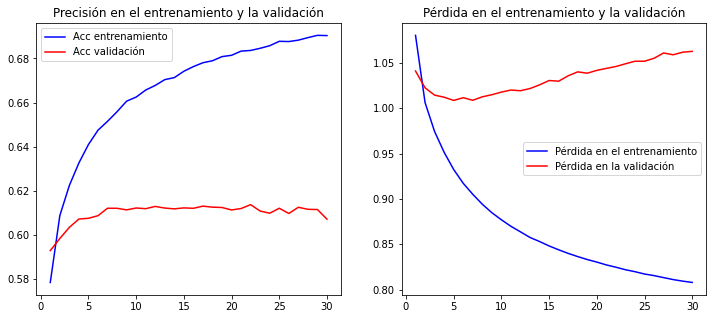

In [ ]:

plot_history( history )

**Accuracy**

En la gráfica de precisión observamos que el modelo predice casi prácticamente con un 70% para los datos de entrenamiento pero no es capaz de generalizar para los datos nuevos (validación), por lo que se deduce que el modelo no está aprendiendo, es decir, el modelo *memoriza* los datos de entrenamiento y no puede clasificar el sentimiento de una frase nueva. En las gráficas se aprecia algo de sobreajuste. El valor del coeficiente de correlación en los datos de validación oscila alrededor del 0.6, es decir, el modelo es capaz de explicar un 60% de la variabilidad de la respuesta, el sentimiento de la frase.

**Loss**

En la gráfica de pérdida en el entrenamiento y la validación, vemos como en las primeras épocas se separan muchísimo las líneas, es decir, la pérdida en el entrenamiendo se separa rápidamente de la de validación. Para el entrenamiento la pérdida disminuye conforme avanzan las épocas y en el conjunto de validación, esta métrica aumenta con el paso de las épocas.



Después de las 30 épocas, la pérdida pequeña para los datos del entrenamiento y el valor del coeficiente de correlación (acurracy) es aceptable y está entorno al 0.7. Ocurre diferente para los datos de validación, ya que la pérdida es bastante mayor y crece conforme avanzan las épocas.

### Word embeddings


Con la técnica word embeddings, como ya hemos descrito antes, mantendremos la secuencia de las palabras a través de la matriz W, que es la matriz que entrenaremos. La técnica asocia un vector a cada palabra


In [ ]:
from keras.preprocessing.text import Tokenizer
# Tokenizador de keras

tokenizer = Tokenizer(num_words=1500) # Como mucho 1500 palabras

tokenizer.fit_on_texts(frases_entrenamiento) # Aquí aprendo el conjunto de entrenamiento, genero el listado de 1500 palabras ordenadas por frecuencia de aparición
# Si aquí la palabra the no se usa, no va a apareder

X_ENTRENAMIENTO_WE = tokenizer.texts_to_sequences(frases_entrenamiento)
X_VALIDACION_WE    = tokenizer.texts_to_sequences(frases_validacion)
X_TESTEO_WE =    tokenizer.texts_to_sequences(frases_testeo)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print( frases_entrenamiento[0] )
print( X_ENTRENAMIENTO_WE[0] )

insufferably
[]


**Observación:** En este caso la representación X_train tiene una lista de índices indicando la palabra. En caso de que la palabra no sea conocida se saltea. De esta forma el largo máximo de la representación coincide con el número de palabras en la sentencia de entrada. Esto quiere decir que sentencias con diferente largo tendrán representaciones de largo distinto.  

In [ ]:
# Se llevan todas las sentencias al mismo largo

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 50 # Máximo número de palabras por frase

# PAD: Decido que las frases con más de 50 palabras las recorto a 50, las que tienen menos relleno con 0 y las de 50 las dejo tal cual
X_ENTRENAMIENTO_WE = pad_sequences(X_ENTRENAMIENTO_WE, padding='post', maxlen=maxlen)
X_VALIDACION_WE = pad_sequences(X_VALIDACION_WE, padding='post', maxlen=maxlen)
X_TESTEO_WE =    pad_sequences(X_TESTEO_WE, padding='post', maxlen=maxlen)

print('Representación de la primera frase del entrenamiento: \n',X_ENTRENAMIENTO_WE[0, :])

Representación de la primera frase del entrenamiento: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print("Dimensiones de los datos de entrenamiento  : ",X_ENTRENAMIENTO_WE.shape)
print("Dimensiones de los datos de validación : ",X_VALIDACION_WE.shape)
print("Dimensiones de los datos de testeo  : ",X_TESTEO_WE.shape)

Dimensiones de los datos de entrenamiento  :  (117045, 50)
Dimensiones de los datos de validación :  (39015, 50)
Dimensiones de los datos de testeo  :  (66292, 50)


Hemos decidido que las frases tengan una longitud de 50. Es decir, las frases con más de 50 palabras las recorto a 50, las que tienen menos relleno con 0 y las de 50 las dejo tal cual.

**Descripción del modelo**:



In [ ]:
#### NOTA PARA LA ENTREGA: CAMBIAR LOS COMENTARIOS VERDES QUE SON DEL EJERCICIO DE CLASE 

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import layers

embedding_dim = 128 # Esto el D, la dim de cada palabra


# Del embeding sale una matriz de 1500 filas (CADA FILA UNA PALABRA DE ESA FRASE) y D columnas. ESTO OCURRE PARA CADA FRASE


vocab_size = tokenizer.num_words # Esto ya si es 1500, le pregunto al tokenizador cuantas palabras tiene
print('Configuración de embedding: \nDimensión del input: nos quedamos con las ',vocab_size,' primeras palabras. \nDimensión de salida: ',embedding_dim,'\nLongitud máxima de frase:',maxlen)

model_2 = Sequential()

# Capa de embeding con tamaño de entrada: 100X128=12800 eltos de la representacion
## Armo una matrix con 100 filas y 64 columnas, donde cada fila es una palabra de esa frase 

model_2.add(layers.Embedding(input_dim=vocab_size,  # 1500 me quedo con las 100 primeras palabras
                           output_dim=embedding_dim, # 128
                           input_length=maxlen) # 1000
)

# Hago 30 convoluciones con una máscara 3XD, de tres filas
model_2.add(layers.Conv1D(20, 4, activation='relu'))
# Max pooling
model_2.add(layers.GlobalMaxPooling1D()) 
# Capa densa de 100 neuronas
model_2.add(layers.Dense(100, activation='relu')) 
# Capa densa de 200 neuronas
model_2.add(layers.Dense(200, activation='relu')) 
# Flatten
model_2.add(Flatten())
# Capa de salida con 5 neuronas
model_2.add(layers.Dense(5, activation='softmax')) # Quiero reconocer 5 clases por eso 5, es la capa de salida

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()


Configuración de embedding: 
Dimensión del input: nos quedamos con las  1500  primeras palabras. 
Dimensión de salida:  128 
Longitud máxima de frase: 50
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           192000    
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 20)            10260     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 20)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 100)               2100      
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                

In [ ]:
history_2 = model_2.fit(X_ENTRENAMIENTO_WE, y_entrenamiento_categorico ,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_VALIDACION_WE, y_validacion_categorico),
                    batch_size=32)


Epoch 1/20
3658/3658 [==============================] - 19s 5ms/step - loss: 1.0449 - accuracy: 0.5881 - val_loss: 0.9892 - val_accuracy: 0.6087
Epoch 2/20
3658/3658 [==============================] - 19s 5ms/step - loss: 0.9381 - accuracy: 0.6310 - val_loss: 0.9681 - val_accuracy: 0.6182
Epoch 3/20
3658/3658 [==============================] - 18s 5ms/step - loss: 0.8911 - accuracy: 0.6493 - val_loss: 0.9447 - val_accuracy: 0.6276
Epoch 4/20
3658/3658 [==============================] - 18s 5ms/step - loss: 0.8611 - accuracy: 0.6610 - val_loss: 0.9458 - val_accuracy: 0.6290
Epoch 5/20
3658/3658 [==============================] - 19s 5ms/step - loss: 0.8349 - accuracy: 0.6719 - val_loss: 0.9498 - val_accuracy: 0.6307
Epoch 6/20
3658/3658 [==============================] - 19s 5ms/step - loss: 0.8157 - accuracy: 0.6776 - val_loss: 0.9633 - val_accuracy: 0.6334
Epoch 7/20
3658/3658 [==============================] - 18s 5ms/step - loss: 0.7969 - accuracy: 0.6851 - val_loss: 0.9632 - val_ac

In [ ]:
loss, accuracy = model_2.evaluate(X_ENTRENAMIENTO_WE, y_entrenamiento_categorico, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_2.evaluate(X_VALIDACION_WE, y_validacion_categorico, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7559
Testing Accuracy:  0.6182


In [ ]:
y_val_pred = np.argmax(model_2.predict(X_VALIDACION_WE), axis=1)

1220/1220 [==============================] - 2s 2ms/step


A continuación mostramos el classification report con el objetivo de conocer las métricas de accuracy para cada una de las clases.

In [ ]:
import sklearn
print(sklearn.metrics.classification_report(y_validacion, # Etiquetas de validación
                                      y_val_pred, # Clasificacion de validación
                                      target_names=["Negativo","Algo negativo","Neutro","Algo positivo","Positivo"], 
                                      sample_weight=None, digits=2, output_dict=False))



               precision    recall  f1-score   support

     Negativo       0.41      0.39      0.40      1790
Algo negativo       0.50      0.41      0.45      6857
       Neutro       0.69      0.82      0.75     19826
Algo positivo       0.57      0.40      0.47      8244
     Positivo       0.48      0.43      0.45      2298

     accuracy                           0.62     39015
    macro avg       0.53      0.49      0.50     39015
 weighted avg       0.60      0.62      0.60     39015



Podemos afirmar que la **precisión** global es de 0.62, sin embargo, esta métrica varía en función de las clases. Cabe destacar, que la clase que el modelo consigue clasificar mejor es el sentimiento *neutro*, con casi un valor de 0.7, seguida de la clase *algo positivo* con un valor de precisión del 57%. A esta clase le sigue el sentimiento *algo negativo*, con un valor de un 50%, aquí la métrica ya comienza a ser bastante pobre. Las clases que peor clasifica la red son la clase *positiva*, con un 0.48 y la clase *negativa*, donde la métrica es muy pobre, del 41%. El modelo clasifica peor las clases extremas, o negativa o positiva, y sin embargo, la clase neutra es la que mejor consigue distinguir y generalizar el modelo.

El **recall**, que es la capacidad del algoritmo (modelo) de encontrar cada una de las clases, está alrededor del 40% para todas las clases salvo para la clase *neutro*, que supera el 80%. Salvo para la etiqueta *neutro*, esta métrica es muy pobre.

Ocurre lo mismo para el **f1-score**, donde todas las clases no superan el valor de 0.47 salvo la clase neutra, con un valor de 0.75, que es bueno, ya que el mayor valor admisible de este parámetro es 1.

Que el modelo clasifique mejor a la clase neutra podría explicarse con el **support**, es decir, el número de frases de cada clase que hay en el dataset de validación. Para la clase *neutro* hay muchas mas instancias que para el resto, siendo las clases extremas las que menor representación tiene en el dataset. Esto ocurre también para los datos de testeo, y por tanto, el modelo comprende mucho mejor aquella etiqueta que más ha entrenado.

La conclusión es la siguiente:

- **Problema**: datos no balanceados
- **Posible solución**: aplicar técnicas de balanceo de datos como undersampling, donde disminuiriamos a la clase mayoritaria (neutro), oversampling, en este caso generaríamos más registros de las clases extremas, o balanceo mixto, que consiste en una combinación de ambas técnicas.

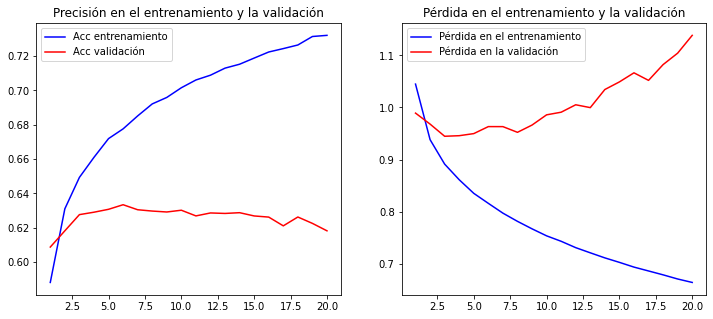

In [ ]:
# Modelo de prueba 2
plot_history(history_2)

**Accuracy**

En la gráfica de precisión observamos que después de las 20 épocas el modelo es capaz de predecir por encima del 70% para los datos de entrenamiento pero no es capaz de generalizar para los datos nuevos, ya que en el conjunto de validación, el coeficiente de correlación está alrededor de un valor $R^2 \approx 0.62$. Esta separación que vemos en la gráfica indica algo de sobreajuste, el modelo clasifica mejor las frases de entrenamiento y la generalización no es muy óptima.

**Loss**

En la gráfica de pérdida, vemos que conforme aumenta el número de épocas las líneas se van separando cada vez más, es decir, la pérdida en el entrenamiendo se separa rápidamente de la de validación, en particular, a partir de la segunda época. Después de las 20 épocas, la pérdida es pequeña en los datos del entrenamiento, ocurriendo lo contrario para los datos de validación, ya que la pérdida es bastante mayor y crece conforme avanzan las épocas.

**--------------------------------------------------------------------**

Overfitting, el modelo no generaliza bien con datos nuevos, pero después de muchas configuraciones con diferentes hiperparámetros, el mejor que hemos encontrado.



A continuación vamos a exponer los diferentes modelos que hemos entrenado con sus diferentes configuraciones de hiperparámetros, además de las métricas de precisión obtenidas, ya que la pérdida era mas o menos similar, aunque aumentaba ligeramente cuando la precisión bajaba.

Modelo de prueba 1: Con 1000 palabraas de max length 150 neuronas en la capa densa y 50 épocas

- Training Accuracy: 0.7512
- Testing Accuracy:  0.6195

Modelo de prueba 2. Con 1000 palabraas de max length 150 neuronas en la capa densa y 20 épocas

- Training Accuracy: 0.77
- Testing Accuracy:  0.616

Modelo de prueba 3. Con 1000 palabraas de max length 150 neuronas en la capa densa y 15 épocas

- Training Accuracy: 0.79
- Testing Accuracy:  0.618

Modelo de prueba 4. Con 1000 palabraas de max length 150 neuronas en la capa densa y 6 épocas

- Training Accuracy: 0.7989
- Testing Accuracy:  0.60

Modelo 5: con palabras de 500 max length y 60 neuronas en la cpaa densa y 20 épocas: la métrica acurracy está por el 50% y loss por encima de 1 

Modelo 6: con palabras de 50 max length y 150 neuronas en la capa densa y 10 épocas: 

- Training Accuracy: 0.7138
- Testing Accuracy:  0.6218

Modelo 7:  Embedding de 128 y palabras de 50 max; model_2.add(layers.Dense(2048, activation='relu')); model_2.add(Dropout(0.2)) ;model_2.add(layers.Dense(64, activation='relu')) ;model_2.add(Dropout(0.2)); conv1D; maxpooling; flatten y capa de salida densa con 5 neuronas y acitvación softmax

- Training Accuracy: 0.6360
- Testing Accuracy:  0.6120

Modelo 8: Es el mejor modelo y lo describiremos abajo

Training Accuracy: 0.7598
Testing Accuracy:  0.6262



**Nota**: En todos los modelos se ha utlizado lo siguiente:
- Optimizador adam
- Pérdida cross entropy categórico
- Métrica del rendimiento del modelo: precisión (Acurracy)



*Conclusión*: cuantas más convoluciones mejores las métricas y cuantas menos épocas mejores las métricas.

Después de haber entrenado la red con las diferentes configuraciones descritas anteriormente, y otras que no se han anotado debido a la pobreza de las métricas, concluímos que con las herramientas que conocemos, no hemos podido configurar una red que nos proporcione una métrica acurracy mejor que 0.6218 en la validación. Por tanto, el mejor modelo, que es aquel que nos proporcione mejores métricas en la validación es: **modelo 8**

Descripción del modelo secuencial: 


- Embedding con frases de máximo 50 palabras y dimensión de salida 128. Utilizo las 1500 palabras top en el tokenizador
- 20 convoluciones 1D con una máscara 4x4
- Una capa densa con 100 neuronas completamnete conectadas y activación relu
- Una capa densa con 200 neuronas completamente conectadas y activación relu
- Una capa de salida con 5 neuronas (5 clases) y activación softmax





## Predicción en el conjunto de testeo


A continuación, vamos utilizar este modelo con los datos de testeo, para poder clasificar las frases contenidas en este dataset:


In [ ]:
predicciones_test = model_2.predict(X_TESTEO_WE)

2072/2072 [==============================] - 4s 2ms/step


In [ ]:

print('Esta es la matriz donde tenemos asocia en cada frase (representada por una fila) las diferentes probabilidades de pertenecer a cada una de las cinco clases.')
print(predicciones_test)

Esta es la matriz donde tenemos asocia en cada frase (representada por una fila) las diferentes probabilidades de pertenecer a cada una de las cinco clases.
[[1.5987778e-02 4.5859891e-01 4.2348769e-01 9.8148845e-02 3.7767142e-03]
 [1.5987778e-02 4.5859891e-01 4.2348769e-01 9.8148845e-02 3.7767142e-03]
 [6.0538474e-02 1.7051899e-01 5.2547145e-01 2.1409433e-01 2.9376805e-02]
 ...
 [3.4900400e-04 1.0847702e-02 8.5570240e-01 1.3217221e-01 9.2874223e-04]
 [3.4900400e-04 1.0847702e-02 8.5570240e-01 1.3217221e-01 9.2874223e-04]
 [5.5229045e-02 5.5618554e-01 3.7694743e-01 1.1586453e-02 5.1488318e-05]]


In [ ]:
print('La clasificación final de cada frase será aquella etiqueta a la que se le asocie una mayor probabilidad.')
sentimiento_prediccion = np.argmax(predicciones_test, axis=-1)

La clasificación final de cada frase será aquella etiqueta a la que se le asocie una mayor probabilidad.


In [ ]:
Resultados = pd.DataFrame({'PhraseId': frases_testeo, 'Sentiment': sentimiento_prediccion})

In [ ]:
print('Se muestran ahora unas cuantas frases del conjunto de datos test y el sentimiento asociado:\n')
print(Resultados.head(10))

Se muestran ahora unas cuantas frases del conjunto de datos test y el sentimiento asociado:

                                            PhraseId  Sentiment
0  an intermittently pleasing but mostly routine ...          1
1  an intermittently pleasing but mostly routine ...          1
2                                                 an          2
3  intermittently pleasing but mostly routine effort          2
4         intermittently pleasing but mostly routine          1
5                        intermittently pleasing but          2
6                            intermittently pleasing          2
7                                     intermittently          2
8                                           pleasing          2
9                                                but          2


In [ ]:
print('Clasificación de las frases test:')
for i in range(0,15):
  print('\nFrase',i+1,':',Resultados.iloc[i,0])
  print('\nSentimiento:',Resultados.iloc[i,1])
  print('\n')
for i in range(200,215):
  print('\nFrase',i+1,':',Resultados.iloc[i,0])
  print('\nSentimiento:',Resultados.iloc[i,1])
  print('\n')
for i in range(600,610):
  print('\nFrase',i+1,':',Resultados.iloc[i,0])
  print('\nSentimiento:',Resultados.iloc[i,1])
  print('\n')

Clasificación de las frases test:

Frase 1 : an intermittently pleasing but mostly routine effort

Sentimiento: 1



Frase 2 : an intermittently pleasing but mostly routine effort

Sentimiento: 1



Frase 3 : an

Sentimiento: 2



Frase 4 : intermittently pleasing but mostly routine effort

Sentimiento: 2



Frase 5 : intermittently pleasing but mostly routine

Sentimiento: 1



Frase 6 : intermittently pleasing but

Sentimiento: 2



Frase 7 : intermittently pleasing

Sentimiento: 2



Frase 8 : intermittently

Sentimiento: 2



Frase 9 : pleasing

Sentimiento: 2



Frase 10 : but

Sentimiento: 2



Frase 11 : mostly routine

Sentimiento: 2



Frase 12 : mostly

Sentimiento: 2



Frase 13 : routine

Sentimiento: 2



Frase 14 : effort

Sentimiento: 2



Frase 15 : 

Sentimiento: 2



Frase 201 : sort

Sentimiento: 2



Frase 202 : the frenzied comic moments never click

Sentimiento: 2



Frase 203 : the frenzied comic moments

Sentimiento: 3



Frase 204 : frenzied comic moments

Sent

También hemos probado un modelo con dos neuronas bidirecionales LSTM, una capa densa de 128 neuronas, dropout de 0.5 y la capa de salida con 5 neuronas. Hemos decidido probar esta configuración debido a que investigando sobre el reto, vimos en los códigos de otros usuarios que la precisión aumentaba considerablemente al añadir esta configuración. Sin embargo, esto no ocurría en nuestro caso, ya que la métrica de precisión continuaba alrededor del 61%. Además, el coste computacional de generar este modelo era altísimo, además del tiempo que tardaba su ejecución. Por este motivo, decidimos dejar como modelo final la red de convolución descrita anteriormente.

Las redes neuronales bidireccionales con celdas de memoria LSTM (Long Short-Term Memory units) son muy utilizadas en el procesamiento del lenguaje natural y funciona de la siguiente forma: Consta de dos capas, una que aprende de unos datos de entrenamiento y otra que retrocede en el tiempo, para así poder aprender mejor las representtaciones futuras. Es decir, este tipo de redes neuronales es capz de analizar oraciones hacia delante y hacia atrás. Cada una de las capas genera un vector de salida para cada una de las palabras de cada frase y ambos vectores se concatenan a uno solo que es el que modela el derecho como el revés de la frase. Sin embargo, podría ser al no haber estudiado en profundidad este tipo de redes, el motivo de no haber sabido configurarla correctamente, por lo que podría ser un campo objeto de nuestro estudio en el futuro.



A continuación, dejamos a modo informativo la configuración de la red bidireccional LSTM:





**Model: "sequential_13"**

*Layer (type) |Output| Shape|Param * 

> embedding_12 (Embedding)    (None, 50,300)         450000    

> bidirectional (Bidirectional) (None, 50,256)         439296                                                       
> bidirectional_1 (Bidirectional) (None,128)              164352    
     
> dense_30 (Dense)(None, 128)16512     
                                                                 
> dropout_22 (Dropout)(None, 128)0         
                                                                 
>dense_31 (Dense)(None, 5)645       
                                                             
=================================================================
Total params: 1,070,805
Trainable params: 1,070,805
Non-trainable params: 0


Aún con 5 épocas y un batch size de 256 seguía un costo computacional muy alto sin grandes mejoras.

A continuación dejamos el código pero sin ejecutar.

In [ ]:
## No quitar, voy a comentarlo y ya lo elimino
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout, Bidirectional, LSTM
from keras import layers

embedding_dim = 300 # Esto el D, la dim de cada palabra


# Del embeding sale una matriz de 1500 filas (CADA FILA UNA PALABRA DE ESA FRASE) y D columnas. ESTO OCURRE PARA CADA FRASE

vocab_size = tokenizer.num_words # Esto ya si es 1500, le pregunto al tokenizador cuantas palabras tiene
model_3 = Sequential()
print('Configuración de embedding: \nDimensión del input: nos quedamos con las ',vocab_size,' primeras palabras. \nDimensión de salida: ',embedding_dim,'\nLongitud máxima de frase:',maxlen)

model_3.add(layers.Embedding(input_dim=vocab_size,  # 1500 me quedo con las 100 primeras palabras
                           output_dim=embedding_dim, # 300
                           input_length=maxlen) # 50
)

model_3.add(layers.Bidirectional(LSTM(128, return_sequences=True, dropout=0.8, recurrent_dropout = 0.8)))
model_3.add(layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5, recurrent_dropout = 0.5)))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(layers.Dense(5, activation='softmax')) # Quiero reconocer 5 clases por eso 5, es la capa de salida

model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_3.summary()


Configuración de embedding: 
Dimensión del input: nos quedamos con las  1500  primeras palabras. 
Dimensión de salida:  300 
Longitud máxima de frase: 50


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           450000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 5)                

In [ ]:
# history_2 = model_3.fit(X_ENTRENAMIENTO_WE, y_entrenamiento_categorico ,
#                     epochs=5,
#                     verbose=True,
#                     validation_data=(X_VALIDACION_WE, y_validacion_categorico),
#                     batch_size=256)